From 2008 to 2009, the U.S. was in the throes of a deep recession that saw unemployment skyrocket, the collapse of the global financial sector requiring bank bailouts, and a scarcity of valuable assets. The consequences of this recession are still felt today.

Preceded by this recession was a inversion in the yield curve, which measures the difference between yield rates on U.S. treasury notes. These notes are sold to a lender for guaranteed rates, allowing a safe investment of capital in times of trouble. In particular, the 10-Year yield fell to nearly 0.60 basis points below the 3-Month yield.

All economic recessions in the modern age have been preced by yield curve inversions such as these. Examining the steepness of the inversion as well as the timing can offer valuable insight into when an economic recession may be in the works.

We will be using data gathered from the U.S. office of the treasury to analyze the yield curve and find the probability of a recession occurring in the next four quarters.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
yields = pd.read_csv('treasuryyield.csv')
yields.head()

,id,title/_type,updated,author/name,link/_rel,link/_title,link/_href,category/_term,category/_scheme,content/properties/Id/_m:type,...,content/properties/BC_30YEAR/_m:null,content/properties/BC_3MONTH/_m:null,content/properties/BC_6MONTH/_m:null,content/properties/BC_1YEAR/_m:null,content/properties/BC_2YEAR/_m:null,content/properties/BC_3YEAR/_m:null,content/properties/BC_5YEAR/_m:null,content/properties/BC_7YEAR/_m:null,content/properties/BC_10YEAR/_m:null,content/properties/BC_2MONTH/__text
0,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(1),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(2),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(3),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(4),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(5),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the data is pretty messy and has a lot of unnecessary columns. let's only include the columns that we need (and renamed them).

In [5]:
cols = ['content/properties/NEW_DATE/__text', 'content/properties/BC_3MONTH/__text', 'content/properties/BC_6MONTH/__text','content/properties/BC_1YEAR/__text',
       'content/properties/BC_2YEAR/__text', 'content/properties/BC_3YEAR/__text', 'content/properties/BC_5YEAR/__text', 'content/properties/BC_7YEAR/__text',
       'content/properties/BC_10YEAR/__text']

new_cols = ['DATE', '3MONTH','6MONTH','1YEAR','2YEAR','3YEAR','5YEAR','7YEAR','10YEAR']
yields = yields[cols]
yields.columns = new_cols

yields['DATE'] = yields['DATE'].str.replace(r'T00:.*','') # cleaning up date column

yields['DATE'] = pd.to_datetime(yields.DATE)

yields = yields.sort_values(by=['DATE']) # sorting the data by date

yields['3MONTH'] = yields['3MONTH'].astype(float)
yields['10YEAR'] = yields['10YEAR'].astype(float)

yields.head()

,DATE,3MONTH,6MONTH,1YEAR,2YEAR,3YEAR,5YEAR,7YEAR,10YEAR
1752,1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94
1751,1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99
1753,1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98
1755,1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99
1754,1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02


We can now plot these yields to determine the relationship between yield curve inversions and economic recessions. The standard metric is an inversion of the 3 month treasury yield and the 10 year. We can plot this first.

(Idea for graph: y axis is yield curve inversion amount and x is time, with shading to show economic recessions. For each bond timeframe, subtract the 10 year rate from it (ex: 6MONTH - 10YEAR) and only keep the positive values for each (maybe replace all negatives by zero or just show positive half of graph.)

In [6]:
# first i want to find sections where the yield curve is inverted to show below.

yields['difference'] = yields['3MONTH'] - yields['10YEAR']

# now create a new dataframe that only includes inverted rows (in this case where the difference col is positive)

inversion = yields[yields['difference'] > 0]
inversion[250:]

,DATE,3MONTH,6MONTH,1YEAR,2YEAR,3YEAR,5YEAR,7YEAR,10YEAR,difference
3187,2006-12-08,4.97,5.08,4.95,4.68,4.57,4.53,4.54,4.56,0.41
3186,2006-12-11,4.93,5.07,4.94,4.67,4.55,4.50,4.50,4.52,0.41
3199,2006-12-12,4.93,5.06,4.91,4.61,4.49,4.45,4.45,4.49,0.44
3198,2006-12-13,4.94,5.07,4.95,4.70,4.60,4.54,4.55,4.58,0.36
3200,2006-12-14,4.96,5.08,4.97,4.73,4.63,4.58,4.58,4.60,0.36
3202,2006-12-15,4.91,5.07,4.96,4.73,4.62,4.57,4.57,4.60,0.31
3201,2006-12-18,4.96,5.09,4.97,4.71,4.62,4.57,4.57,4.60,0.36
3194,2006-12-19,4.96,5.08,4.96,4.71,4.62,4.57,4.57,4.60,0.36
3193,2006-12-20,4.96,5.08,4.96,4.71,4.62,4.57,4.57,4.60,0.36
3195,2006-12-21,4.97,5.06,4.93,4.66,4.57,4.52,4.52,4.55,0.42


c:\programs\python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


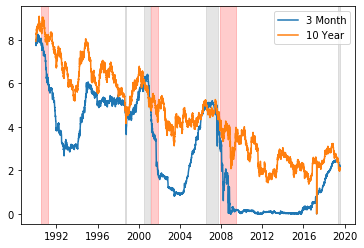

In [7]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,6)
ax.plot(yields['DATE'], yields['3MONTH'], label='3 Month')
ax.plot(yields['DATE'], yields['10YEAR'], label='10 Year')


ax.axvspan(datetime.datetime(1990,7,1,0,0,0), datetime.datetime(1991,3,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2001,3,1,0,0,0), datetime.datetime(2001,11,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2007,12,1,0,0,0), datetime.datetime(2009,6,1,0,0,0), alpha=0.2, color='red')

# manually entering inversion times atm
ax.axvspan(datetime.datetime(1998,9,10,0,0,0), datetime.datetime(1998,10,5,0,0,0), alpha=0.2, color='grey')
ax.axvspan(datetime.datetime(2000,7,7,0,0,0), datetime.datetime(2001,1,19,0,0,0), alpha=0.2, color='grey')
ax.axvspan(datetime.datetime(2006,7,17,0,0,0), datetime.datetime(2007,8,27,0,0,0), alpha=0.2, color='grey')
ax.axvspan(datetime.datetime(2019,5,13,0,0,0), datetime.datetime(2019,7,26,0,0,0), alpha=0.2, color='grey')
plt.legend()
plt.show()

Though not shown in this data, the 1991 recession was preceded by a yield curve bottoming out at -0.15 basis points, which according to Estrella and Mishkin (1996) forecasting a mild recession.

The graph shows a clear relationship between yield curve inversions and recessions: not every inversion led to a recession, but every recession that did occur was preceded by an inversion. 

Estrella and Mishkin calculations went further. They calculated a probability relationship between the depth of a yield curve inversion and the chance of a recession in the next four quarters. For example, -0.15 basis points equates to a 30% chance of recession in the next four quarters. the 2001 recession was preceded by a -0.95 basis point inversion, implying ~65% chance.

For 2019, the deepest so far is -0.39, leading to a ~35% chance of a recession within the next four quarters.

Let's also graph the yield curve for other bond timeframes to see if there are any relationships there. Let's add in the 1-Year, 2-Year, and 2-Month bonds.

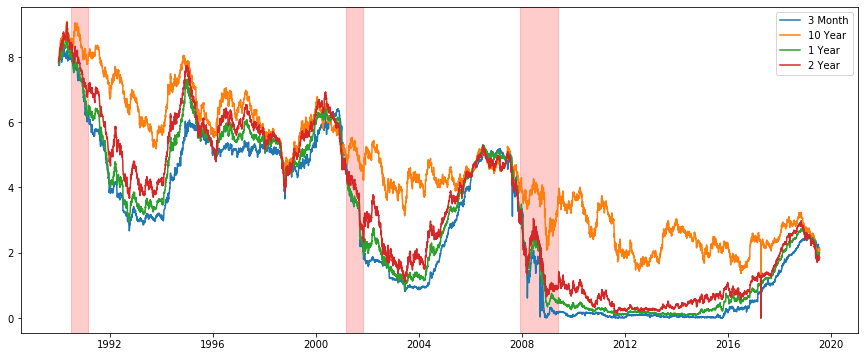

In [8]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,6)
ax.plot(yields['DATE'], yields['3MONTH'], label='3 Month')
ax.plot(yields['DATE'], yields['10YEAR'], label='10 Year')
ax.plot(yields['DATE'], yields['1YEAR'], label='1 Year')
ax.plot(yields['DATE'], yields['2YEAR'], label='2 Year')

ax.axvspan(datetime.datetime(1990,7,1,0,0,0), datetime.datetime(1991,3,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2001,3,1,0,0,0), datetime.datetime(2001,11,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2007,12,1,0,0,0), datetime.datetime(2009,6,1,0,0,0), alpha=0.2, color='red')

plt.legend()
plt.show()

This plot is very messy, but it does appear that before recessions other yields also invert versus the 10-Year with longer term notes preceding earlier term notes. Instead of doing it this way, we can come up with a better looking graph by plotting the yield curve for different notes.

In [9]:
yields['3monthdiff'] = yields['10YEAR'] - yields['3MONTH']
yields['6monthdiff'] = yields['10YEAR'] - yields['6MONTH']
yields['1yeardiff'] = yields['10YEAR'] - yields['1YEAR']
yields['2yeardiff'] = yields['10YEAR'] - yields['2YEAR']

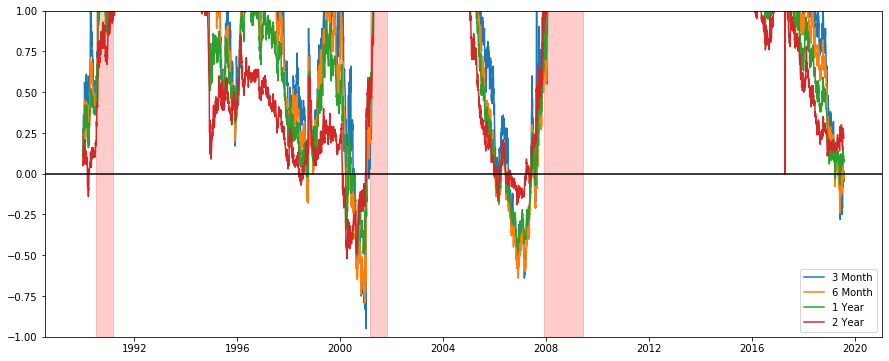

In [10]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,6)
ax.plot(yields['DATE'], yields['3monthdiff'], label='3 Month')
ax.plot(yields['DATE'], yields['6monthdiff'], label='6 Month')
ax.plot(yields['DATE'], yields['1yeardiff'], label='1 Year')
ax.plot(yields['DATE'], yields['2yeardiff'], label='2 Year')

ax.axhline(color='black')
ax.set_ylim(-1,1)

ax.axvspan(datetime.datetime(1990,7,1,0,0,0), datetime.datetime(1991,3,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2001,3,1,0,0,0), datetime.datetime(2001,11,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2007,12,1,0,0,0), datetime.datetime(2009,6,1,0,0,0), alpha=0.2, color='red')

plt.legend()
plt.show()

It's a bit easier to see here that the previous two recessions also saw an inversion in all 4 treasury yields listed. So far in 2019, the 2 Year yields has not inverted, and none have reached the depth of inversion seen before the previous two recessions. This of course does not mean that the current rate inversion won't deepen.

Let's take a closer look a the 2019 inversion.

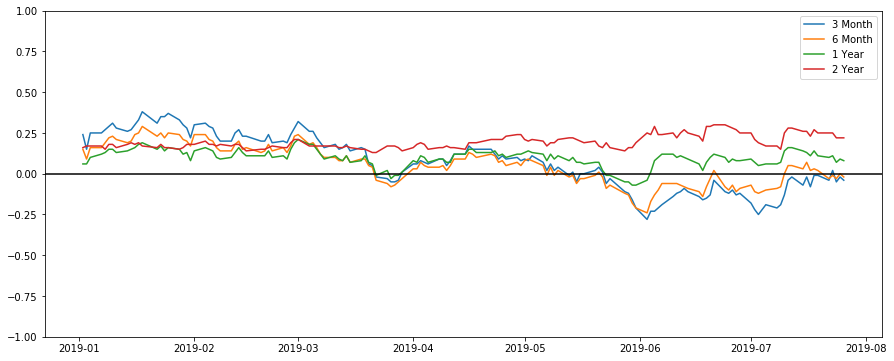

,DATE,3MONTH,6MONTH,1YEAR,2YEAR,3YEAR,5YEAR,7YEAR,10YEAR,difference,3monthdiff,6monthdiff,1yeardiff,2yeardiff,YEAR
7257,2019-01-02,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,-0.24,0.24,0.15,0.06,0.16,2019
7258,2019-01-03,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,-0.15,0.15,0.09,0.06,0.17,2019
7259,2019-01-04,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,-0.25,0.25,0.16,0.10,0.17,2019
7260,2019-01-07,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,-0.25,0.25,0.16,0.12,0.17,2019
7261,2019-01-08,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,-0.27,0.27,0.19,0.13,0.15,2019


In [20]:
yields['YEAR'] = pd.DatetimeIndex(yields['DATE']).year
yields_2019 = yields[yields['YEAR'] == 2019]

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,6)
ax.plot(yields_2019['DATE'], yields_2019['3monthdiff'], label='3 Month')
ax.plot(yields_2019['DATE'], yields_2019['6monthdiff'], label='6 Month')
ax.plot(yields_2019['DATE'], yields_2019['1yeardiff'], label='1 Year')
ax.plot(yields_2019['DATE'], yields_2019['2yeardiff'], label='2 Year')

ax.axhline(color='black')
ax.set_ylim(-1,1)

plt.legend()
plt.show()

yields_2019.head()

We can check this behaviour against yield behaviour seen preceding previous recessions. We are mainly concerned about how the inversion behaves when just after entering inversion territory.